In [1]:
import pandas as pd
housing= pd.read_csv('C:/Users/Vidisha More/OneDrive/Desktop/housing.csv')
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [2]:
def find_correlation(housing_numeric):
  # computing standard correlation coefficient
  corr_matrix = housing_numeric.corr()
  # fetch and return attribute correlates 
  # with the median housing value
  return corr_matrix["median_house_value"].sort_values(
    ascending=False)
  
# drop ocean_proximity column
housing_numeric = housing.drop("ocean_proximity", axis=1)
# find correlation coefficient
cor_coef = find_correlation(housing_numeric)
print("Correlation Coefficient::", cor_coef)


Correlation Coefficient:: median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


<Axes: xlabel='median_income', ylabel='median_house_value'>

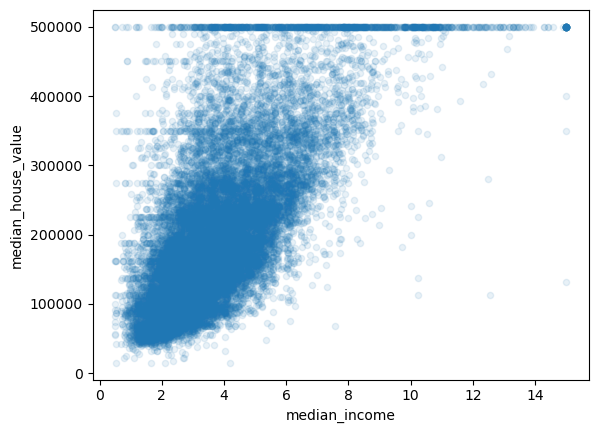

In [3]:
# scatter plot diagram
housing.plot(kind='scatter', 
             x="median_income", y="median_house_value", 
             alpha=0.1)


array([[<Axes: title={'center': 'median_income'}>]], dtype=object)

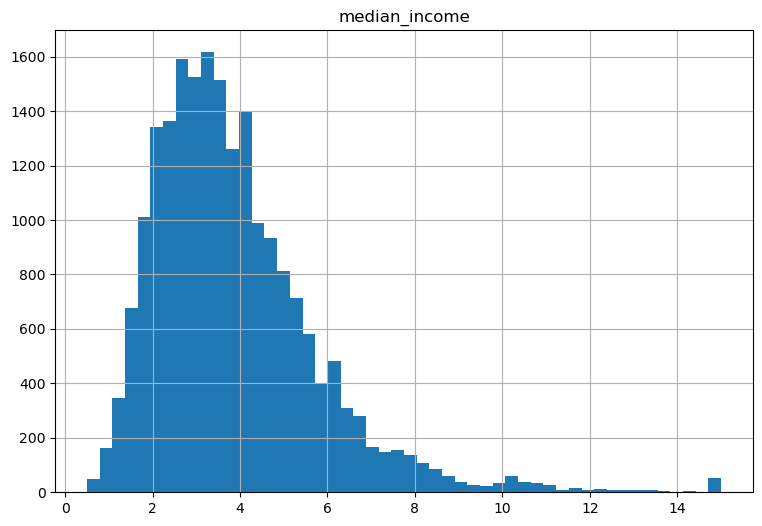

In [4]:
housing.hist(column='median_income', 
             bins=50, figsize=(9,6))


<Axes: >

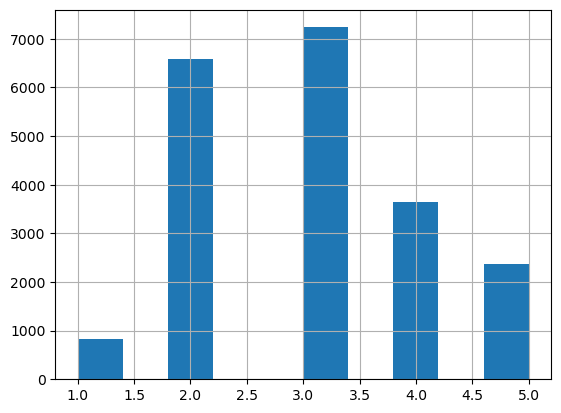

In [5]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error

def fetch_housing_data():
  return pd.read_csv('C:/Users/Vidisha More/OneDrive/Desktop/housing.csv')

def set_income_category(housing_selected):
    # set income category based on median income
    housing_selected["income_cat"] = pd.cut(housing_selected["median_income"], 
                                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                            labels=[1, 2, 3, 4, 5])
    return housing_selected

def get_strat_train_test_dataset(housing_selected):
    # stratified sampling
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    housing_split = split.split(housing_selected, housing_selected["income_cat"])
    # get train and test dataset
    for train_index, test_index in housing_split:
        train_set = housing_selected.loc[train_index]
        test_set = housing_selected.loc[test_index]
        
    # drop income_category from train and test dataset
    for set_ in (train_set, test_set):
        set_.drop("income_cat", axis=1, inplace=True)
    
    return train_set, test_set

def sprt_train_and_label_set(train_set):
    # drop median_house_value from training data
    housing_tr = train_set.drop("median_house_value", axis=1)
    # create a new dataframe with median_house_value
    housing_labels = train_set["median_house_value"].copy()
    return housing_tr, housing_labels

def get_rmse(housing_labels, predicted_data):
    # get mean squared error to analyse prediction error
    mse = mean_squared_error(housing_labels, predicted_data)
    rmse = np.sqrt(mse)
    return rmse

# get housing data
housing = fetch_housing_data()
# copy median_income and median_house_value
housing_selected = housing[['median_income', 'median_house_value']].copy()
# set income category based on median_icome
housing_selected = set_income_category(housing_selected)
# stratified sampling
train_set, test_set = get_strat_train_test_dataset(housing_selected)
# seperate label and data from training set
housing_tr, housing_labels = sprt_train_and_label_set(train_set)


In [7]:
from sklearn.linear_model import LinearRegression
# linear regression model for best fit
lin_reg = LinearRegression()
lin_reg.fit(housing_tr, housing_labels)

# sample data to test from training set
sample_data = housing_tr.iloc[:5]
sample_labels = housing_labels.iloc[:5]

# predict the median_house_value
predicted_data = lin_reg.predict(sample_data)
print("Predicted Price:", predicted_data)
print("Actual Price:", list(sample_labels))


Predicted Price: [135958.75805364 309735.008975   165232.3998617  138162.41971241
 232903.1766333 ]
Actual Price: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [8]:
# pass the training data and identify the prediction error
predicted_data = lin_reg.predict(housing_tr)
lin_rmse = get_rmse(housing_labels, predicted_data)
print("root mean square error:", lin_rmse)


root mean square error: 84056.18763327331


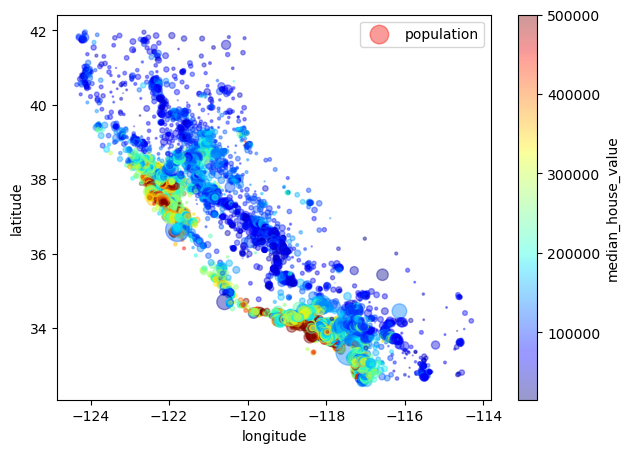

In [9]:
import matplotlib.pyplot as plt
# plot
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", figsize=(7,5), 
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()


In [10]:
from sklearn.impute import SimpleImputer

# drop ocean_proximity column 
housing_num = housing.drop("ocean_proximity", axis=1)

# imputer instance
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
housing_imputer = imputer.transform(housing_num)
print("Imputer return data type:", type(housing_imputer))

# convert back to pandas dataframe
housing_new = pd.DataFrame(
    housing_imputer, columns=housing_num.columns, index=housing_num.index)
print("New Housing Dataset:")
print(housing_new.info())


Imputer return data type: <class 'numpy.ndarray'>
New Housing Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


def transformation_pipeline():
    # pipeline execution
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler())
    ])
    return num_pipeline


# get housing data
housing = fetch_housing_data()
# set income category based on median_icome
housing = set_income_category(housing)
# stratified sampling
train_set, test_set = get_strat_train_test_dataset(housing)
# seperate label and data from training set
housing_tr, housing_labels = sprt_train_and_label_set(train_set)
# drop ocean_proximity 
housing_num = housing_tr.drop("ocean_proximity", axis=1)
# numeric pipeline execution
num_pipeline = transformation_pipeline()
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [13]:
from sklearn.linear_model import LinearRegression

# linear regression model to identify best fit
lin_reg = LinearRegression()
lin_reg.fit(housing_num_tr, housing_labels)
# pass the prepared data and predict the housing price
predicted_data = lin_reg.predict(housing_num_tr)
# pass the predicted data and identify the prediction error
lin_rmse = get_rmse(housing_labels, predicted_data)
print("Linear Regression Prediction error:", lin_rmse)


Linear Regression Prediction error: 69957.72079714121
